<a href="https://colab.research.google.com/github/helinatefera/10xweek2/blob/task-2/notebooks/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,1.311448e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,1.311448e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,1.311448e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,1.311448e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [15]:
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])
data['Day'] = data['Start'].dt.date

In [8]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Day
0,1.311448e+19,2019-04-04 12:01:00,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,2019-04-04
1,1.311448e+19,2019-04-09 13:04:00,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,2019-04-09
2,1.311448e+19,2019-04-09 17:42:00,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335,2019-04-09
3,1.311448e+19,2019-04-10 00:31:00,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530,2019-04-10
4,1.311448e+19,2019-04-12 20:10:00,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589,2019-04-12


In [9]:
session_frequency = data.groupby(['MSISDN/Number', 'Day']).agg(
    session_count=('Bearer Id', 'count')  # Count sessions per user per day
).reset_index()

In [10]:
session_frequency.head()

,MSISDN/Number,Day,session_count
0,3.360101e+10,2019-04-24,2
1,3.360103e+10,2019-04-24,1
2,3.360105e+10,2019-04-24,1
3,3.360107e+10,2019-04-24,1
4,3.360108e+10,2019-04-24,2


In [13]:
len(session_frequency),len(data)

(13951, 16737)

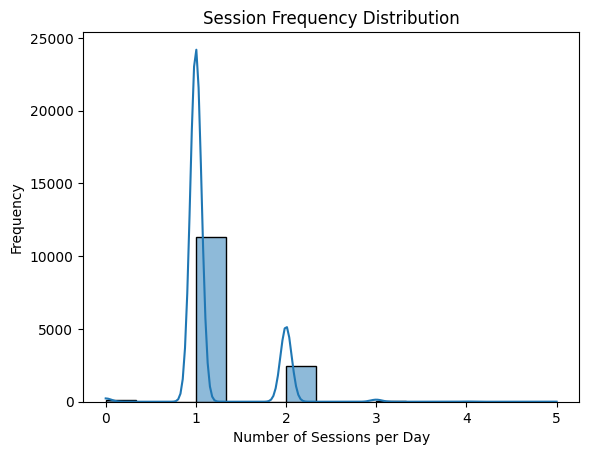

In [14]:
sns.histplot(session_frequency['session_count'], kde=True)
plt.title('Session Frequency Distribution')
plt.xlabel('Number of Sessions per Day')
plt.ylabel('Frequency')
plt.show()

In [16]:
data['Session_Duration'] = (data['End'] - data['Start']).dt.total_seconds()

In [17]:
data[['Bearer Id', 'Start', 'End', 'Session_Duration']].head()

,Bearer Id,Start,End,Session_Duration
0,1.311448e+19,2019-04-04 12:01:00,2019-04-25 14:35:00,1823640.0
1,1.311448e+19,2019-04-09 13:04:00,2019-04-25 08:15:00,1365060.0
2,1.311448e+19,2019-04-09 17:42:00,2019-04-25 11:58:00,1361760.0
3,1.311448e+19,2019-04-10 00:31:00,2019-04-25 07:36:00,1321500.0
4,1.311448e+19,2019-04-12 20:10:00,2019-04-25 10:40:00,1089000.0


In [18]:
user_session_duration = data.groupby('MSISDN/Number').agg(
    total_duration=('Session_Duration', 'sum'),
    average_duration=('Session_Duration', 'mean')
).reset_index()

user_session_duration.head()

,MSISDN/Number,total_duration,average_duration
0,3.360101e+10,37200.0,18600.0
1,3.360103e+10,21780.0,21780.0
2,3.360105e+10,31740.0,31740.0
3,3.360107e+10,32760.0,32760.0
4,3.360108e+10,52800.0,26400.0


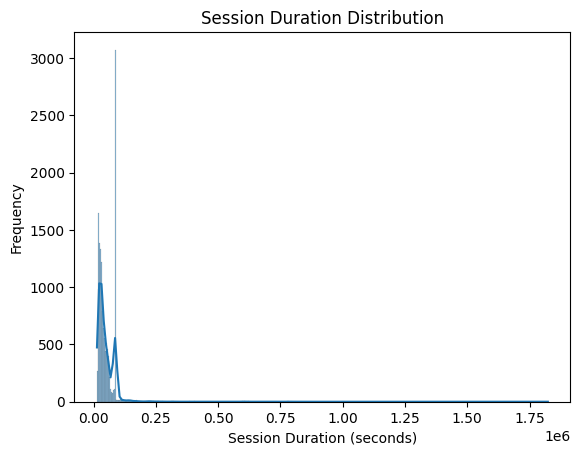

In [19]:
sns.histplot(data['Session_Duration'], kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [20]:
data['Total_Traffic_Bytes'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

In [21]:
data[['Bearer Id', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total_Traffic_Bytes']].head()

,Bearer Id,Total DL (Bytes),Total UL (Bytes),Total_Traffic_Bytes
0,1.311448e+19,308879636,36749741,345629377
1,1.311448e+19,653384965,53800391,707185356
2,1.311448e+19,279807335,27883638,307690973
3,1.311448e+19,846028530,43324218,889352748
4,1.311448e+19,569138589,38542814,607681403


**Insights**
- **Top Active Users:** Customers with the highest session frequency.
- **Heavy Users:** Customers with the longest session durations.
- **Data-Intensive Users:** Customers consuming the most bandwidth.


In [26]:
customer_metrics = data.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),
    total_duration_ms=('Dur. (ms)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum')
).reset_index()


### Top 10 customers per engagement metric

In [29]:
customer_metrics['total_traffic'] = customer_metrics['total_download'] + customer_metrics['total_upload']

In [31]:
top_session_frequency = customer_metrics.nlargest(10, 'session_frequency')
top_total_duration = customer_metrics.nlargest(10, 'total_duration_ms')
top_total_traffic = customer_metrics.nlargest(10, 'total_traffic')

In [33]:
top_session_frequency,top_total_duration,top_total_traffic

(       MSISDN/Number  session_frequency  total_duration_ms  total_download  \
 11461   3.369966e+10                  7             422051      3436152722   
 9226    3.366913e+10                  6            1532447      2455155816   
 9241    3.366917e+10                  6             865103      1982362962   
 751     3.361471e+10                  5             134842      2572509232   
 2965    3.365033e+10                  5             607148      2194889471   
 3537    3.365287e+10                  5             600453      2483157588   
 4169    3.365895e+10                  5             454191      2224742868   
 12801   3.376353e+10                  5            1507998      2028763303   
 133     3.360369e+10                  4             408039      1472057852   
 877     3.361644e+10                  4             639515      1102807461   
 
        total_upload  total_traffic  
 11461     309331755     3745484477  
 9226      263384849     2718540665  
 9241      2358

## k-means (k=3) to classify customers in three groups of engagement.

In [35]:
scaler = MinMaxScaler()

In [37]:
normalized_metrics = scaler.fit_transform(
    customer_metrics[['session_frequency', 'total_duration_ms', 'total_traffic']]
)

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics['engagement_cluster_norm'] = kmeans.fit_predict(normalized_metrics)


In [52]:
customer_metrics[['MSISDN/Number', 'session_frequency', 'total_duration_ms', 'total_traffic', 'engagement_cluster']]

,MSISDN/Number,session_frequency,total_duration_ms,total_traffic,engagement_cluster
0,3.360101e+10,2,37104,1457410944,1
1,3.360103e+10,1,21785,718452416,0
2,3.360105e+10,1,31778,250441008,2
3,3.360107e+10,1,32737,373706286,2
4,3.360108e+10,2,52765,1120386688,1
...,...,...,...,...,...
13731,3.378978e+10,1,16388,401573795,2
13732,3.378978e+10,1,69600,270924420,2
13733,3.378986e+10,1,33395,330513882,2
13734,3.378991e+10,1,86399,366089210,2


In [53]:
centroids = kmeans.cluster_centers_
f"Cluster centroids: {centroids}"

'Cluster centroids: [[0.29342027 0.02561532 0.28464096]\n [0.14808333 0.01322596 0.07024166]\n [0.14133655 0.01264684 0.18224955]]'

The cluster centroids represent the average values of the normalized engagement metrics for each cluster. Here's how you can interpret them:

### **Cluster Centroids Interpretation**

| Cluster | Normalized Session Frequency | Normalized Total Duration | Normalized Total Traffic | Characteristics |
|---------|-------------------------------|---------------------------|--------------------------|-----------------|
| **0**   | 0.293                        | 0.026                     | 0.285                    | Moderate session frequency and total traffic, with slightly higher engagement compared to other clusters. |
| **1**   | 0.148                        | 0.013                     | 0.070                    | Low engagement users with the lowest session frequency, duration, and traffic. |
| **2**   | 0.141                        | 0.013                     | 0.182                    | Similar session frequency and duration as Cluster 1 but with moderately higher traffic. |

---

### **Key Insights**
1. **Cluster 0 (Moderate Users)**:
   - This group has the highest session frequency and traffic among the three clusters.
   - Likely consists of users moderately engaged with the service.
   - These users might require some incentives to increase engagement further.

2. **Cluster 1 (Low Engagement Users)**:
   - This cluster has the lowest engagement across all metrics.
   - Possible reasons include poor network quality, lack of interest, or users who use the service sparingly.
   - Strategies: Improve quality of service or target these users with marketing campaigns.

3. **Cluster 2 (Traffic-Focused Users)**:
   - While their session frequency and duration are low (similar to Cluster 1), their traffic is significantly higher.
   - These users might be engaging in fewer but more intensive sessions, such as downloading or streaming.

---

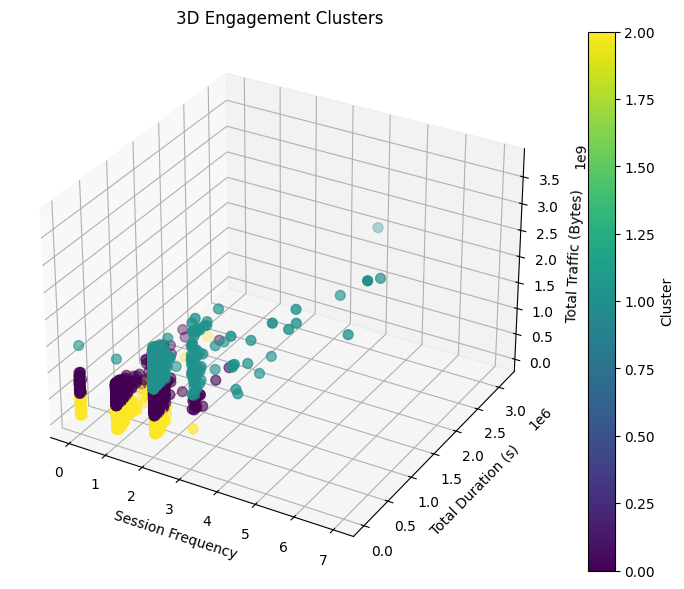

In [54]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    customer_metrics['session_frequency'],
    customer_metrics['total_duration_ms'],
    customer_metrics['total_traffic'],
    c=customer_metrics['engagement_cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("3D Engagement Clusters")
ax.set_xlabel("Session Frequency")
ax.set_ylabel("Total Duration (s)")
ax.set_zlabel("Total Traffic (Bytes)")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics['engagement_cluster'] = kmeans.fit_predict(customer_metrics[['session_frequency', 'total_duration_ms', 'total_traffic']])


In [56]:
customer_metrics[['MSISDN/Number', 'session_frequency', 'total_duration_ms', 'total_traffic', 'engagement_cluster']]

,MSISDN/Number,session_frequency,total_duration_ms,total_traffic,engagement_cluster
0,3.360101e+10,2,37104,1457410944,1
1,3.360103e+10,1,21785,718452416,0
2,3.360105e+10,1,31778,250441008,2
3,3.360107e+10,1,32737,373706286,2
4,3.360108e+10,2,52765,1120386688,1
...,...,...,...,...,...
13731,3.378978e+10,1,16388,401573795,2
13732,3.378978e+10,1,69600,270924420,2
13733,3.378986e+10,1,33395,330513882,2
13734,3.378991e+10,1,86399,366089210,2


## Aggregate user total traffic per application

In [62]:
applications = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

In [67]:
for app in applications:
    data[f'{app} Total'] = data[app] if 'UL' in app else data[app.replace('DL', 'UL')] + data[app]
aggregated_traffic = data.groupby('MSISDN/Number')[f'{app} Total'].sum().reset_index()
top_10_users = {}
for app in applications:
    app_total_column = f'{app} Total'
    top_10_users[app] = data.groupby('MSISDN/Number')[app_total_column].sum().nlargest(10)

# Display the results for each application
for app, top_users in top_10_users.items():
    print(f"\nTop 10 users for {app} based on total traffic:")
    print(top_users)


Top 10 users for Social Media DL (Bytes) based on total traffic:
MSISDN/Number
3.366913e+10    15325750
3.369966e+10    13958866
3.366917e+10    13054787
3.365287e+10    10892430
3.366276e+10    10091618
3.376353e+10    10028110
3.366546e+10     9986635
3.365251e+10     9918002
3.365895e+10     9709398
3.362153e+10     9497892
Name: Social Media DL (Bytes) Total, dtype: int64

Top 10 users for Social Media UL (Bytes) based on total traffic:
MSISDN/Number
3.366913e+10    203071
3.366917e+10    197984
3.365922e+10    192109
3.369966e+10    192019
3.366747e+10    170943
3.365895e+10    168801
3.365033e+10    165782
3.362708e+10    164575
3.377035e+10    160632
3.366276e+10    160513
Name: Social Media UL (Bytes) Total, dtype: int64

Top 10 users for Youtube DL (Bytes) based on total traffic:
MSISDN/Number
3.369966e+10    176066213
3.365033e+10    149572832
3.376353e+10    140673930
3.365895e+10    137362299
3.361471e+10    131333452
3.365922e+10    118501515
3.366917e+10    106859785
3.3

In [69]:
total_traffic = {}


In [71]:
for app in applications:
    # Add total traffic for DL and UL columns
    total_traffic[app] = data[app] + data[app.replace('DL', 'UL')]

total_traffic_per_app = {app: total_traffic[app].sum() for app in applications}
sorted_apps = sorted(total_traffic_per_app.items(), key=lambda x: x[1], reverse=True)
top_3_apps = sorted_apps[:3]

top_3_apps_names = [app[0] for app in top_3_apps]
top_3_apps_values = [app[1] for app in top_3_apps]

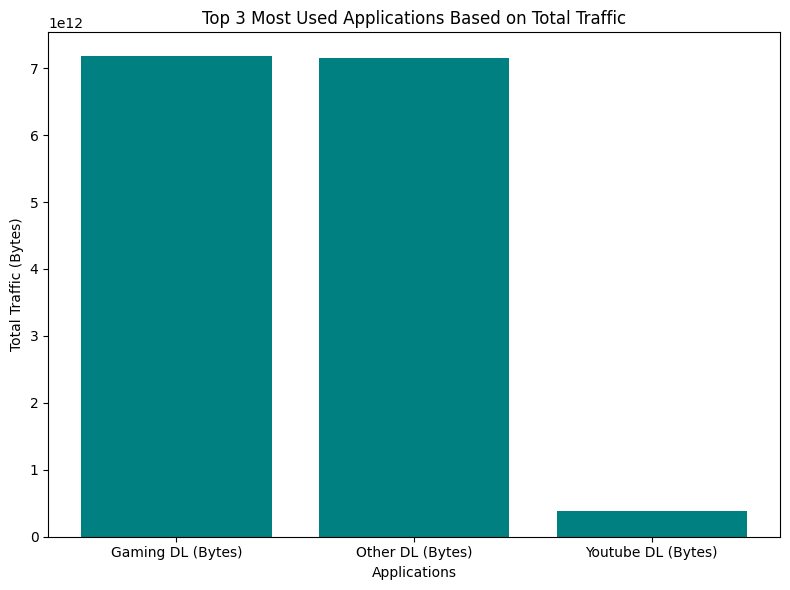

In [72]:
plt.figure(figsize=(8, 6))
plt.bar(top_3_apps_names, top_3_apps_values, color='teal')

# Add labels and title
plt.xlabel('Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Top 3 Most Used Applications Based on Total Traffic')

# Show plot
plt.tight_layout()
plt.show()

In [98]:
engagement_metrics = [
    'session_frequency',
    'total_duration_ms',
    'total_traffic'
]

In [99]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_metrics[engagement_metrics])

In [100]:
wcss = []  # Within-cluster sum of squares

In [101]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

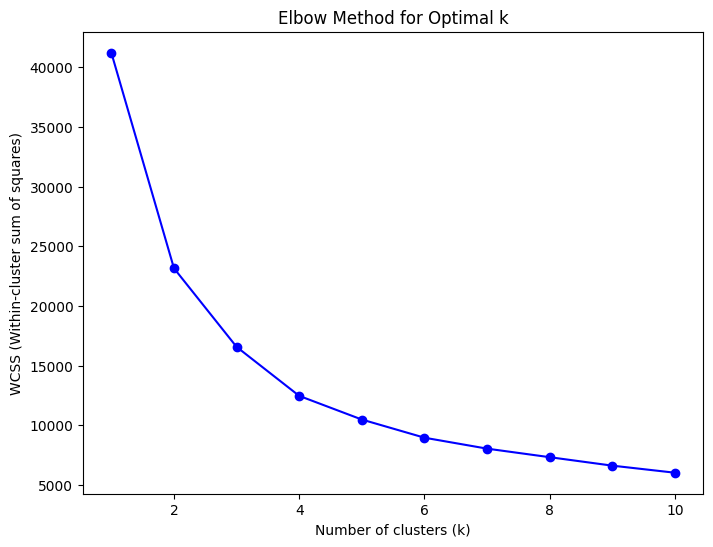

In [102]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()